### Part B: Data Processing, Feature Selection, and Initial Estimation

### 10. Read in the winequality-white.csv file as a Pandas data frame.

In [1]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Importing the dataset
df = pd.read_csv("winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### there are 3258 rows with bad quality wine and 1640 with good quality. It seems that the datset is imbalance datset.

In [4]:
## Printing datset's info such as not null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### 11. The target will be the “quality” column which represents the rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality> 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine).

In [5]:
## Create a function to convert values of quality as required by the question.
## condition is quality>5 == good(1) or quality<=5 == bad(0)
def label(quality):
    if quality > 5:
        return 1
    else:
        return 0



In [6]:
## Applying above function to the quality column of the dataframe
df["quality"] = df["quality"].apply(label)
df.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


###    The dataset with quality column contains 0 and 1 instead of 3,4,5,6,7 and 8 where below 5 is' 0' and     above 5 is '1'.

### 12. Provide a table with univariate statistics of your data (mean, standard deviation, and quartiles, min, max, missing count, number of unique values).

In [7]:
## Checking the null values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
## df.describe will provide all the non null count, mean, std, min, max and quartiles of the dataframe
df_st1=df.describe()

In [9]:
## Create a table with missing count and number of unique values"
## for dataframe
df_st2 = pd.DataFrame({
     
    "missing count": df.isnull().sum(),
    "number of unique values":df.nunique()
}).T


In [10]:
## Combining df_st1 and df_st2 for the combined statistical table.
df_statistics = pd.concat([df_st1, df_st2])
df_statistics.round(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000
mean,6.8548,0.2782,0.3342,6.3914,0.0458,35.3081,138.3607,0.9940,3.1883,0.4898,10.5143,0.6652
std,0.8439,0.1008,0.1210,5.0721,0.0218,17.0071,42.4981,0.0030,0.1510,0.1141,1.2306,0.4720
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000,0.0000
25%,6.3000,0.2100,0.2700,1.7000,0.0360,23.0000,108.0000,0.9917,3.0900,0.4100,9.5000,0.0000
50%,6.8000,0.2600,0.3200,5.2000,0.0430,34.0000,134.0000,0.9937,3.1800,0.4700,10.4000,1.0000
75%,7.3000,0.3200,0.3900,9.9000,0.0500,46.0000,167.0000,0.9961,3.2800,0.5500,11.4000,1.0000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000,1.0000
missing count,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
number of unique values,68.0000,125.0000,87.0000,310.0000,160.0000,132.0000,251.0000,890.0000,103.0000,79.0000,103.0000,2.0000


### The data table df_statistics provides with all the statistics for the dataframe, where we see no null values and nan values.

### 13. Generate pair plots using the seaborn package to help identify redundant features. For any redundant features(?), report, drop, and explain your logic (w/ markdown). 

In [11]:
##Importing libraries for pair plot
import matplotlib.pyplot as plt
import seaborn as sns

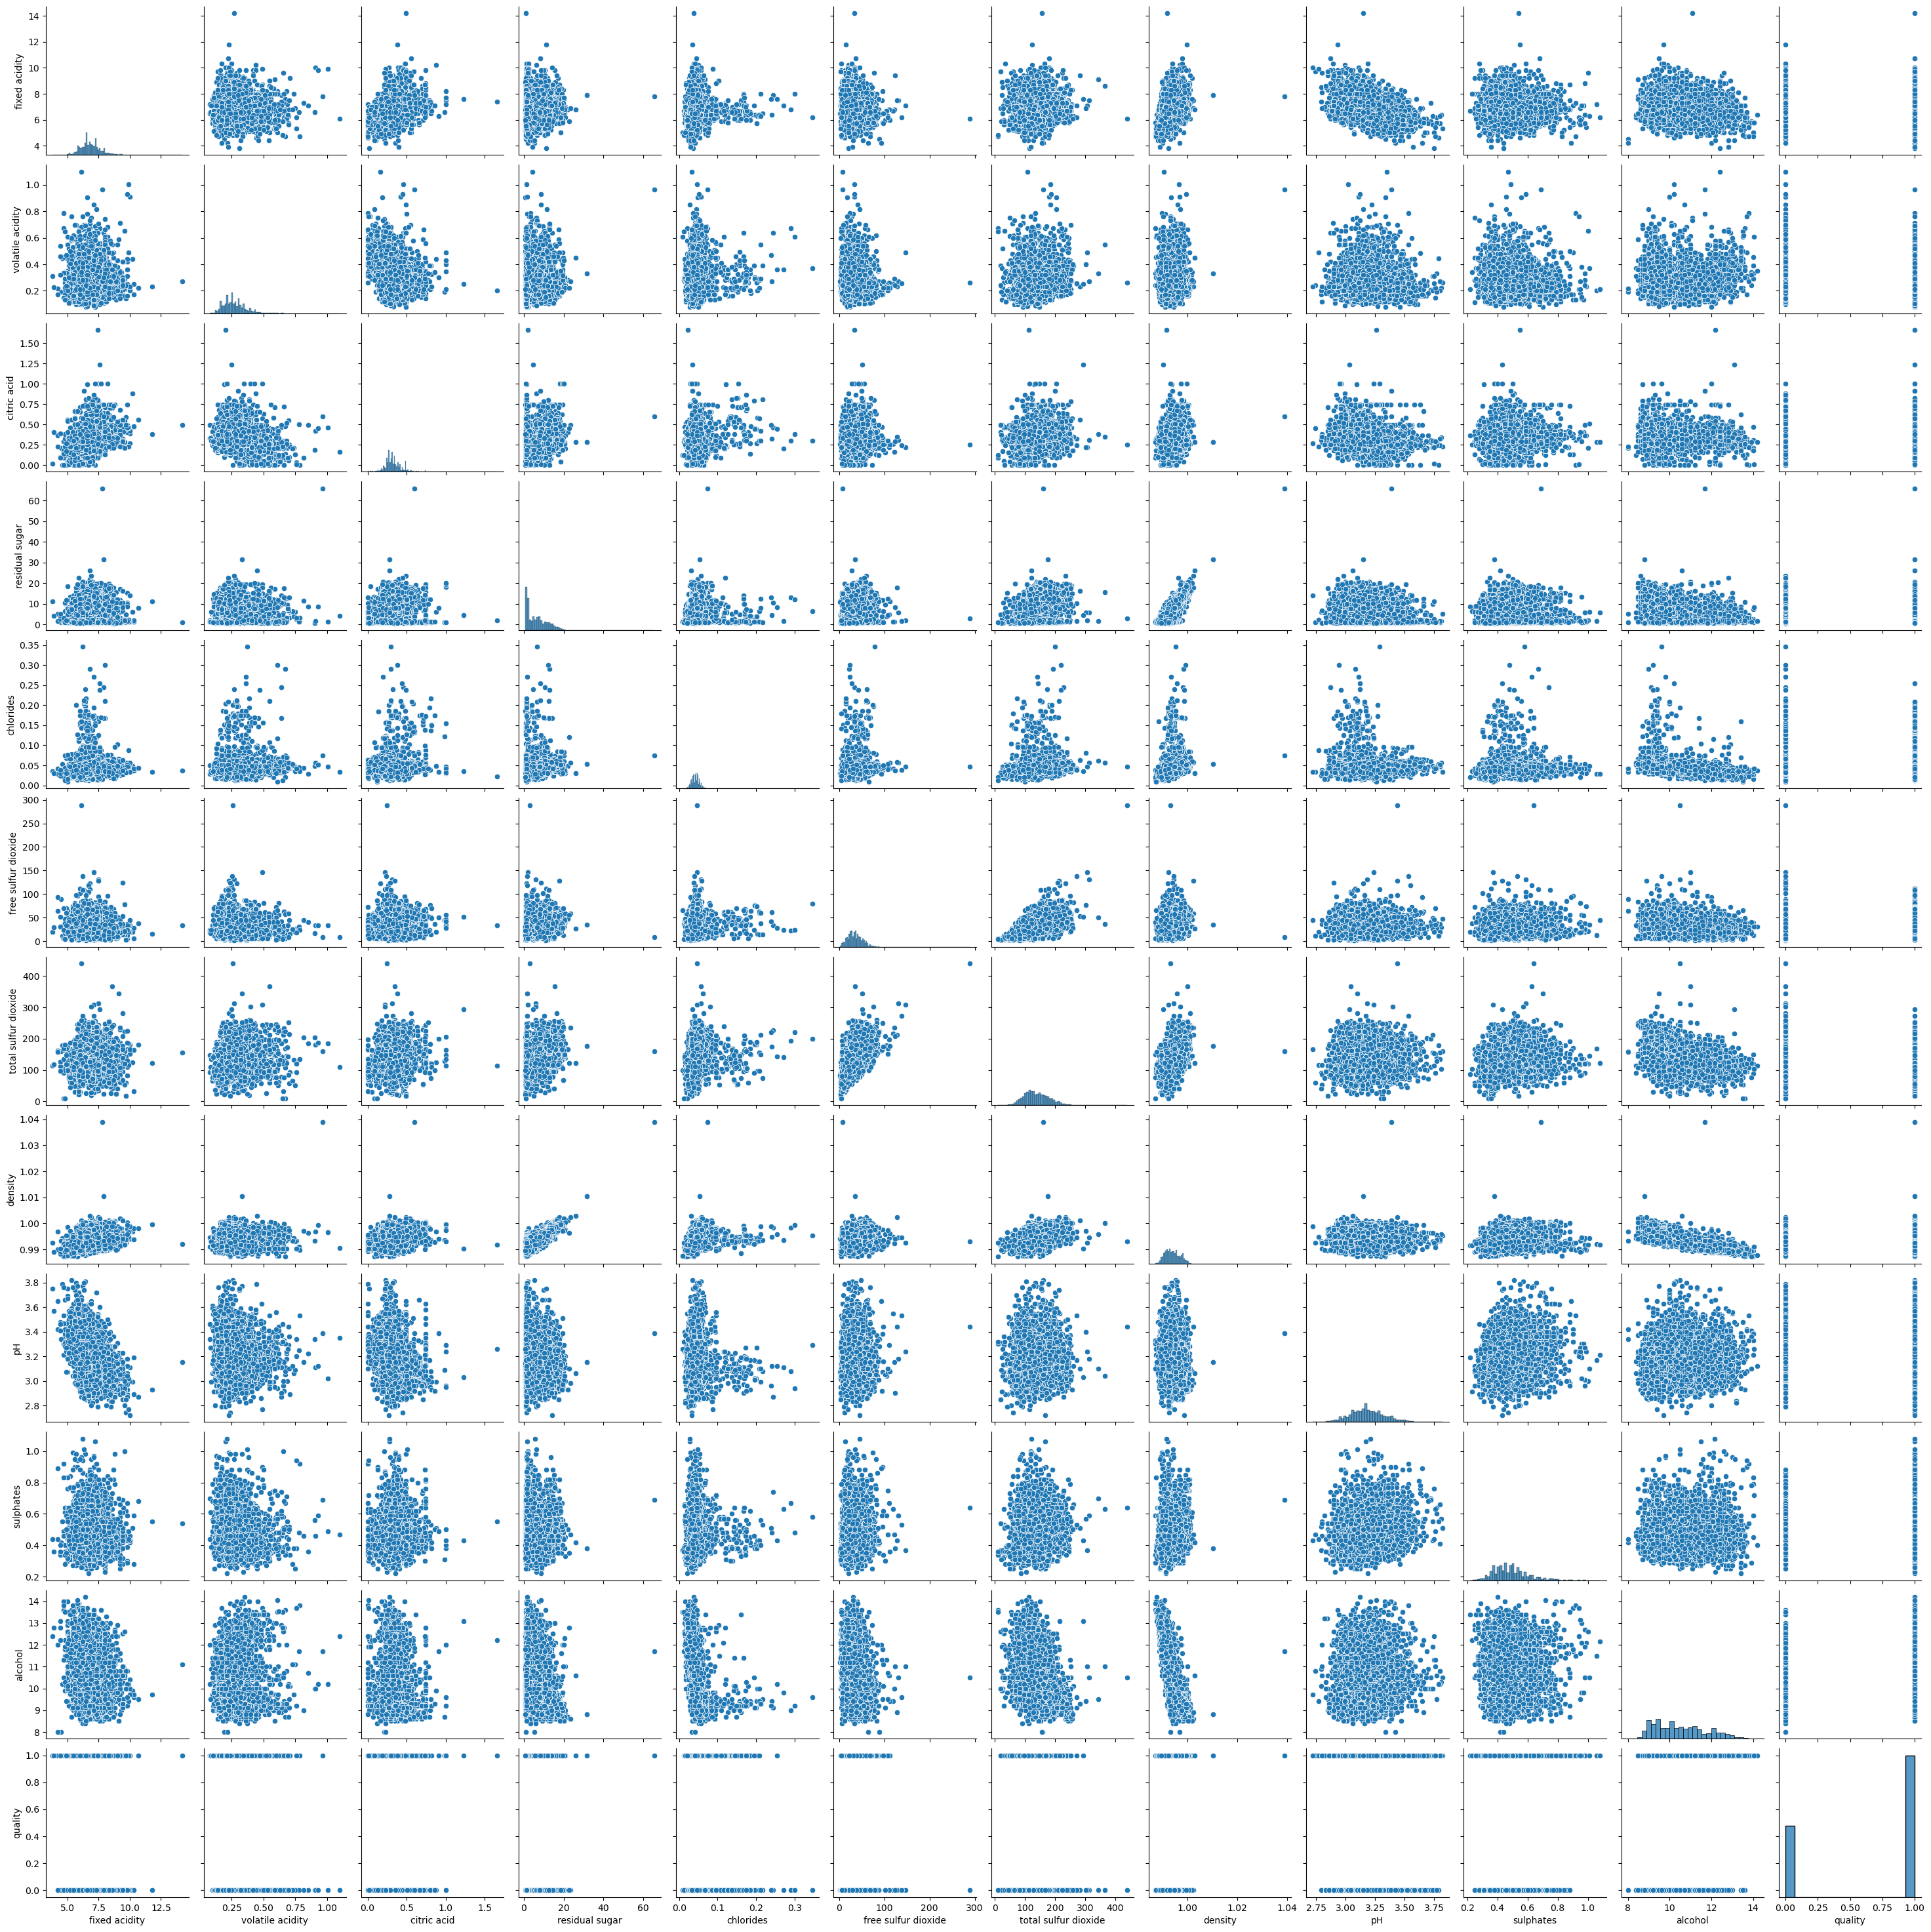

In [12]:
## Plot a pairplot for the dataset 
sns.pairplot(df)
plt.show()

### Since, the plot is very big and its very time consuming and difficult to evaluate the correlation and redundent,so lets produce a correlation table for all the columns and try to find the redundent columns for the given dataset.

In [13]:
#3 Printing the correlation table for df1
df1=df.corr()
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.089749
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.225440
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.000700
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183939
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.001278
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.051858


### We can see that citric acid, sulphates and free sulphur dioxide have very low correlation values with quality which we can say that they have very less effect on the quality of the wine so, we are removing these two columns as redundent columns. There could be more redundent columns but we are assuming these two for this evaluation.

In [14]:
#3 display the final data frame for our model training and testing by removing the redundent columns.
columns_to_remove = ["citric acid", "free sulfur dioxide"]
df_final = df.drop(columns=columns_to_remove)
df_final

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,20.7,0.045,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,1.6,0.049,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,6.9,0.050,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,1


### 14. Use your “partition” function to split the data into 80% train and 20% test.

In [15]:
## import libraries for split and train function
from sklearn.model_selection import train_test_split
X= df_final.drop(["quality"],axis=1 ) # all columns of df_final except quality
y=df_final["quality"] 

In [16]:
## Spliting the dataset into80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
## Print the dimension of splited datasets
print(X_train.shape, y_train.shape,"\n")
print("\t\n",X_test.shape, y_test.shape)

(3918, 9) (3918,) 

	
 (980, 9) (980,)


### 15. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance.
 ### a. Use accuracy and F1 score to compare your predictions to the expected labels.

In [18]:
## import libraries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [19]:
## implement knn classifier with neighbours=5 and metric eucledian.
k_c = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [20]:
## fit the training model
k_c.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [21]:
## predict the test model
y_pred= k_c.predict(X_test)

In [22]:
## prinitng top 30 only
print(y_pred[:30])

[1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0]


In [23]:
## Classifaction report
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55       321
           1       0.78      0.83      0.80       659

    accuracy                           0.73       980
   macro avg       0.69      0.67      0.68       980
weighted avg       0.72      0.73      0.72       980



In [24]:
## accuracy of the dataset
print("accuracy for KNN model is", accuracy_score(y_test, y_pred).round(3))

accuracy for KNN model is 0.728


In [25]:
## f1-score of the datset
print("The f1_score for KNN model is", f1_score(y_test, y_pred).round(3))

The f1_score for KNN model is 0.805


### 15.b Now standardize each feature of your training set (subtract mean and divide by standard deviation) and apply trained standardization to the test set. Use the mean and standard deviation values for each feature in the training set to scale the test data (you can use sklearn.preprocessing.StandardScaler

In [26]:
## Normalizing train and test sets
X_train_nor= (X_train-X_train.mean())/ X_train.std()
X_test_nor=(X_test-X_test.mean())/ X_test.std()


In [27]:
## result after normalization
X_train_nor, X_test_nor

(      fixed acidity  volatile acidity  residual sugar  chlorides  \
 4665       0.515054         -1.076096        0.340376  -0.813585   
 1943      -0.669103         -0.288740        1.001943  -0.217184   
 3399      -1.498012          0.400197        0.184713  -0.400692   
 843        0.041391         -0.879257       -0.924385  -0.446569   
 2580       0.988716          0.203358        2.432096   0.333340   
 ...             ...               ...             ...        ...   
 4426      -0.787518         -0.682418        0.009592   0.058078   
 466        0.159807         -1.371354        0.496039  -0.308938   
 3092       0.870300         -0.091901       -0.632517  -0.125430   
 3772      -0.669103         -0.387159        1.410558  -0.492446   
 860        1.462379         -0.091901       -0.924385  -0.721831   
 
       total sulfur dioxide   density        pH  sulphates   alcohol  
 4665             -0.641850 -0.446984 -0.328219  -0.702355  1.540174  
 1943              1.354933 

### 15.c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.

In [28]:
## reimplimanting the knn classifeir for the normalized data
k_c_nor = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
k_c_nor.fit(X_train_nor,y_train)


KNeighborsClassifier(metric='euclidean')

In [29]:
#3 normalized data prediction
y_nor_pred= k_c_nor.predict(X_test_nor)
## prinitng top 20 only
y_nor_pred[:20]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [30]:
## confirming the count of test y
y_nor_pred.shape

(980,)

### d. Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment.

In [31]:
## accuracy report of normalized dataset
print("Normalized accuracy for KNN model is", accuracy_score(y_test, y_nor_pred).round(3))

Normalized accuracy for KNN model is 0.778


In [32]:
## f1-score of normalized dataset
print("The f1_score for KNN model is", f1_score(y_test, y_nor_pred).round(3))

The f1_score for KNN model is 0.838


In [33]:
## classification report
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(y_test, y_nor_pred))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       321
           1       0.82      0.86      0.84       659

    accuracy                           0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.77      0.78      0.77       980



#### e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it.

In [34]:
## taking extra poarameter weights for knn classification for inverse distance
k_c_inv = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights="distance")
k_c_inv.fit(X_train_nor, y_train)


KNeighborsClassifier(metric='euclidean', weights='distance')

In [35]:
## prediction of inverted datset
y_inv_pred=k_c_inv.predict(X_test_nor)

In [36]:
## prinitng top 20 only
y_inv_pred[:20]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [37]:
## accuracy of the inverted dataset
print(" Inverse weighted normalized accuracy for KNN model is", accuracy_score(y_test, y_inv_pred).round(3))

 Inverse weighted normalized accuracy for KNN model is 0.824


In [38]:
## f1-score of inverted dataset
print("The f1_score for KNN model is", f1_score(y_test, y_inv_pred).round(3))

The f1_score for KNN model is 0.872


### The inverse weighted KNN is better with accuracy and f1 score so, its good idea to use 

### 16. Repeat #15 a-d, but using a logistic regression with ‘elasticnet’ or ‘l2’ penalty (feel free to use sklearn.linear_model.LogisticRegression)

In [39]:
## import libraries
from sklearn.linear_model import LogisticRegression

In [40]:
## implement logistic regression
log_reg = LogisticRegression(penalty="l2", solver="saga")
log_reg.fit(X_train, y_train)

C:\Users\ocn\anaconda33\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [41]:
## predicted class
y_log_pred= log_reg.predict(X_test)

In [42]:
## prinitng top 20 only
y_log_pred[:20]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [43]:
## accuracy
print("accuracy for log model is", accuracy_score(y_test, y_log_pred).round(3))

accuracy for log model is 0.686


In [44]:
## f1-score
print("f1-score for log model is", f1_score(y_test, y_log_pred).round(3))

f1-score for log model is 0.796


In [45]:
## normalized logistic legression
log_reg_nor = LogisticRegression(penalty="l2", solver="saga")
log_reg_nor.fit(X_train_nor,y_train)

LogisticRegression(solver='saga')

In [46]:
y_log_nor_pred= log_reg_nor.predict(X_test_nor)
y_log_nor_pred[:20]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [47]:
## accuracy
print("accuracy for log model norm is", accuracy_score(y_test, y_log_nor_pred).round(3))

accuracy for log model norm is 0.748


In [48]:
## normalized
print("f1 for log model norm is", f1_score(y_test, y_log_nor_pred).round(3))

f1 for log model norm is 0.822


In [49]:
print(classification_report(y_test, y_log_nor_pred))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57       321
           1       0.78      0.86      0.82       659

    accuracy                           0.75       980
   macro avg       0.71      0.69      0.70       980
weighted avg       0.74      0.75      0.74       980



### Conclusion:
### Standard normalized log model seems to be better than non normalized as it is producing more  accuracy and f1-score

### 17) Evaluation of an estimator performance via cross-validation: Implement the S-fold cross validation function
a. sFold(folds, data, labels, model, model_args, error_fuction)
i. folds is an integer number of folds.

ii. data is a numpy array with rows representing data samples and columns representing features.

iii. labels is a numpy array with labels corresponding to each row of training_features.

iv. model is an object with the fit and predict methods.

v. model args is a dictionary of arguments to pass to the classification algorithm. If you are unfamiliar, look up using the ** operator to unpack dictionaries as arguments

vi. error_function :Returns error value between predicted and true labels. For example, mean squared error (mse) function could be used as error_function.

b. How it should work:
i. Use a helper function to calculate an s-partition of the data (i.e., partition the data into s equally sized portions). You may use sklearn.model_selection.KFold if you wish and assume data is already shuffled.

ii. For each partition

a. Make a model using the model class

b. Fit the data to all other partitions (1 – folds)

c. Make prediction on current partition

d. Store expected labels and predicted labels for current partition

iii. Calculate the average error (for all partitions) using the error_function on stored expected and predicted labels.

c. It should return a Python tuple with the following
i. Expected labels

ii. Predicted labels

iii. Average error

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.model_selection import KFold
#3 define a function with 6 parameters as stated above 
def sFold(folds, data, labels, model, model_args, error_function):
    ## implement Ffold
    kf = KFold(n_splits=folds)
    ##create empty lists for the final outputs 
    expected_labels = []
    predicted_labels = []
    errors = []
    ## use for loop to go over all the folds 
    for train_index, test_index in kf.split(data):
        # Split data into train and test sets
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        ## Create and fit the model
        clf = model(**model_args)
        clf.fit(X_train, y_train)

        ## Make predictions on the test set
        y_pred = clf.predict(X_test)

        ## Calculate the error using the error function
        error = error_function(y_test, y_pred)

        expected_labels.extend(y_test)
        predicted_labels.extend(y_pred)
        errors.append(error)

    ## Calculate the average error
    average_error = np.mean(errors)

    return expected_labels, predicted_labels, average_error
if __name__ == "__main__":

    ## extract data and labels from the DataFrame
    data = df_final.drop(columns=["quality"]).to_numpy()
    labels = df_final["quality"].to_numpy()

    ## model arguments
    model_args = {'solver': 'lbfgs', 'max_iter': 1000}

    ## apply s fold cross validation here e are doing s=4
    expected_labels, predicted_labels, average_error = sFold(5, data, labels, LogisticRegression, model_args, mean_squared_error)
    
    ## printing only top 20 
    print("The expected labels are:", expected_labels[:20])
    
    print("\nThe predicted labels are:", predicted_labels[:20])
    
    print("\nThe average error is:", round((average_error),3))  

The expected labels are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]

The predicted labels are: [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]

The average error is: 0.257


### The final outputs are actual label, predicted labels and avg accuracy. We have printed only top 20 rows of expected and predicted labels as the values aree in hundreds.

### 18) Only using the training portion of your data, use your sfold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets:
i. k=[1,5,9,11]

b. distance = [Euclidean, Manhattan]
ii. weights = [uniform, distance]

iii. From the returned tuple store as a row in a pandas DataFrame with headers:

Experiment name, k, distance, weights, Average F1

iv. Determine the best model based on the overall performan

In [51]:
## all the libraries are import already in different parts, lets dive into the model.
## the values of for parameters of Knn model  is already given in the question, which are as follows
k_values = [1, 5, 9, 11]
distances = ["euclidean", "manhattan"]
weights = ["uniform", "distance"]


## creating an empty dataframe to populate the resultant values after the model performance
performance_df = pd.DataFrame(columns=['Experiment name', 'n_neighbors', 'distance', 'weights', 'Average F1'])
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
## using for loop to go over all three parameters given in the questions 
## for using sfold function defined in previous question
index_counter = 0
for k in k_values:
    for distance in distances:
        for weight in weights:
            ## define the model with its parameters
              model_args = {'n_neighbors': k, 'weights': weight, 'metric': distance}
                
               # apply sfold cross validation here e are doing s=4, the same function used in last question
              expected_labels5, predicted_labels5, avg_error = sFold(5, train_data, train_labels, KNeighborsClassifier, model_args, f1_score)
              
              ## calculate the average f1-score
              average_f1= f1_score(expected_labels5, predicted_labels5, average="weighted")
            
              performance_df_values = pd.DataFrame({'Experiment name': f'k={k}, distance={distance}, weights={weight}',
                                                  'n_neighbors': k,
                                                  'distance': distance,
                                                  'weights': weight,
                                                  'Average F1': average_f1},
                                                 index=[index_counter])  
              
              ## concatinating df's instead of using append as it warning appeared new version will not
              ##support append instead use concat
              performance_df = pd.concat([performance_df, performance_df_values])

             
df_sorted = performance_df.sort_values(by='Average F1', ascending=False)         
df_sorted.reset_index(drop =True, inplace=True)
df_sorted

,Experiment name,n_neighbors,distance,weights,Average F1
0,"k=5, distance=manhattan, weights=distance",5,manhattan,distance,0.762541
1,"k=11, distance=manhattan, weights=distance",11,manhattan,distance,0.759131
2,"k=9, distance=manhattan, weights=distance",9,manhattan,distance,0.757177
3,"k=5, distance=euclidean, weights=distance",5,euclidean,distance,0.753272
4,"k=11, distance=euclidean, weights=distance",11,euclidean,distance,0.753108
5,"k=9, distance=euclidean, weights=distance",9,euclidean,distance,0.752626
6,"k=1, distance=manhattan, weights=uniform",1,manhattan,uniform,0.741033
7,"k=1, distance=manhattan, weights=distance",1,manhattan,distance,0.741033
8,"k=1, distance=euclidean, weights=uniform",1,euclidean,uniform,0.730935
9,"k=1, distance=euclidean, weights=distance",1,euclidean,distance,0.730935


In [52]:
train_data.shape

(3918, 9)

In [53]:
len(train_labels)

3918

In [54]:
best_model = performance_df[performance_df['Average F1'] == performance_df['Average F1'].max()]

# Display the best model
print("Best Model:")
print(best_model)

Best Model:
                             Experiment name n_neighbors   distance   weights  \
0  k=5, distance=manhattan, weights=distance           5  manhattan  distance   

   Average F1  
0    0.762541  


### Out of 16 models from above the best model for over all performance is row 1 with k=5,distance=manhattan, weight=distance with average f1-score of 0.76

### 19) Repeat #18 for at least 3 experiments for the regularized logistic regression from #16 and discuss why you optimized over you selected hyper-parameters

 Now we are to repeat question 18 using logistic regression from question no.16. For this experiment we need three hypermeter hyper parameters that we are considering 
C_values = [0.1, 1.0, 10.0]  
penalty_values = ['l1', 'l2']

#### Note: As i believe the question says  16, i assume the dataset is also from 16 too which is full dataset which is modified as data in question number 17.

In [55]:
C_values = [0.1, 1.0, 10.0]
penalty_values = ['l1', 'l2']

## Creating an empty DataFrame for logistic regression performance
performance_df = pd.DataFrame(columns=['Experiment name', 'penalty', 'solver', 'C', 'Average F1'])

index_counter = 0

## Creating for loop to iterate over all the hyperparameters of logistic regression
for c in C_values:
    for p in penalty_values:
        # Define the model with its parameters
        solver = 'liblinear' if p == 'l1' else 'lbfgs'
        model_args = {'penalty': p, 'C': c, 'solver': solver, "max_iter":1000}

        ## Apply sFold cross-validation defined in question 17
        expected_labels4, predicted_labels4, avg_error = sFold(5, data, labels, LogisticRegression, model_args, f1_score)

        ## Calculate the average f1-score
        average_f1 = f1_score(expected_labels4, predicted_labels4, average="weighted")

        ## Populating the dataframe with values generated and the hyperparameters used
        performance_df_values = pd.DataFrame({'Experiment name': f'penalty={p}, solver={solver}, C={c}',
                                              'penalty': p,
                                              'solver': solver,
                                              'C': c,
                                              'Average F1': average_f1},
                                             index=[index_counter])

        ## Concatenating DataFrames
        performance_df = pd.concat([performance_df, performance_df_values])

## Display the resulting DataFrame
performance_df

,Experiment name,penalty,solver,C,Average F1
0,"penalty=l1, solver=liblinear, C=0.1",l1,liblinear,0.1,0.709607
0,"penalty=l2, solver=lbfgs, C=0.1",l2,lbfgs,0.1,0.710252
0,"penalty=l1, solver=liblinear, C=1.0",l1,liblinear,1.0,0.734231
0,"penalty=l2, solver=lbfgs, C=1.0",l2,lbfgs,1.0,0.732059
0,"penalty=l1, solver=liblinear, C=10.0",l1,liblinear,10.0,0.736168
0,"penalty=l2, solver=lbfgs, C=10.0",l2,lbfgs,10.0,0.735253



### Using single hyper parameter might not give a best or better results so, its always a good idea to apply multiple hyper parameter and see which one performs the best. Optimizing different solvers, we can identify the one that works best for our  problem and data. The paramater like C helps to strike a balance between a model that fits the training data well without overfitting to noise, aslo l1 and l2 helps in sparsity in feature selection and small cofficient values respectively.  Optimization is a way to ensure that our model is not just fitting the training data but is also capable of making accurate predictions on new data.


### 20) Based on the results above, use the full training portion (80%), to re-estimate your best model. Discuss your model choice

### The questions says to repeat no.19 but with training dataset which was used in question number 18. Taking the training dataset which is train_data already converted into numpy array.

In [56]:
C_values = [0.1, 1.0, 10.0]
penalty_values = ['l1', 'l2']

## Creating an empty DataFrame for logistic regression performance
performance_df = pd.DataFrame(columns=['Experiment name', 'penalty', 'solver', 'C', 'Average F1'])

index_counter = 0

## Creating for loop to iterate over all the hyperparameters of logistic regression
for c in C_values:
    for p in penalty_values:
        # Define the model with its parameters
        solver = 'liblinear' if p == 'l1' else 'lbfgs'
        model_args = {'penalty': p, 'C': c, 'solver': solver, "max_iter":1000}

        ## Apply sFold cross-validation defined in question 17
        expected_labels3, predicted_labels3, avg_error = sFold(5, train_data, train_labels, LogisticRegression, model_args, f1_score)

        ## Calculate the average f1-score
        average_f1 = f1_score(expected_labels3, predicted_labels3, average="weighted")

        ## Populating the dataframe with values generated and the hyperparameters used
        performance_df_values = pd.DataFrame({'Experiment name': f'penalty={p}, solver={solver}, C={c}',
                                              'penalty': p,
                                              'solver': solver,
                                              'C': c,
                                              'Average F1': average_f1},
                                             index=[index_counter])

        ## Concatenating DataFrames
        performance_df = pd.concat([performance_df, performance_df_values])

## Display the resulting DataFrame
performance_df

,Experiment name,penalty,solver,C,Average F1
0,"penalty=l1, solver=liblinear, C=0.1",l1,liblinear,0.1,0.719762
0,"penalty=l2, solver=lbfgs, C=0.1",l2,lbfgs,0.1,0.714328
0,"penalty=l1, solver=liblinear, C=1.0",l1,liblinear,1.0,0.740823
0,"penalty=l2, solver=lbfgs, C=1.0",l2,lbfgs,1.0,0.736722
0,"penalty=l1, solver=liblinear, C=10.0",l1,liblinear,10.0,0.741996
0,"penalty=l2, solver=lbfgs, C=10.0",l2,lbfgs,10.0,0.742139


In [57]:
train_data.shape

(3918, 9)

In [58]:
train_labels.shape

(3918,)

### The result for training portion is some what wiered, all there values of average score seems to be the same,  for the training protion. There are only about 1000 rows difference between data and the training set. There could be various reasons or the values we took for our hyper parameters colud be not perfect for this part. Whereas the Knn model with sfold combination has the variation in  average results however results have no big difference. The Knn model with sfold combination gave the better results for training dataset for this evaluation. 

### 21 Evaluate your best model on the test data and report the performance measures.
i. Precision

ii. Recall

iii. F1 score

iv. Confusion matrix

v. Accuracy & Generalization Error

In [59]:
## all the libraries are import already in different parts, lets dive into the model.
## the values of for parameters of Knn model  is already given in the question, which are as follows
k_values = [1, 5, 9, 11]
distances = ["euclidean", "manhattan"]
weights = ["uniform", "distance"]
# Create an empty DataFrame to populate the resultant values after the model performance
performance_df = pd.DataFrame(columns=['Experiment name', 'n_neighbors', 'distance', 'weights', 'f1-score', 'precision', 'recall', 'generalized error', 'accuracy'])
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize an index counter
index_counter = 0

# Loop through all combinations of k, distance, and weight
for k in k_values:
    for distance in distances:
        for weight in weights:
            # Define the model with its parameters
            model_args = {'n_neighbors': k, 'weights': weight, 'metric': distance}
            
            # Apply sFold cross-validation with the given function on the training data
            expected_labels1, predicted_labels1, avg_error = sFold(5, test_data, test_labels, KNeighborsClassifier, model_args, f1_score)
            
            # Calculate the metrics
            
            f1score = f1_score(expected_labels1, predicted_labels1, average="weighted")
            precision = precision_score(expected_labels1, predicted_labels1, average="weighted")
            recall = recall_score(expected_labels1, predicted_labels1, average="weighted")
            accuracy = accuracy_score(expected_labels1, predicted_labels1)
            generalized_error = 1 - accuracy
            
            # Create a DataFrame for the current experiment
            performance_df_values = pd.DataFrame({
                'Experiment name': f'k={k}, distance={distance}, weights={weight}',
                'n_neighbors': k,
                'distance': distance,
                'weights': weight,
                'f1-score': f1score,
                'precision': precision,
                'recall': recall,
                'generalized error': generalized_error,
                'accuracy': accuracy
            }, index=[index_counter])
            
            # Concatenate the DataFrame to the main performance_df
            performance_df = pd.concat([performance_df, performance_df_values])
            
            # Increment the index counter
            index_counter += 1

# Sort the DataFrame by F1 score in descending order
df_sorted = performance_df.sort_values(by='f1-score', ascending=False)
df_sorted.reset_index(drop=True, inplace=True)
df_sorted

,Experiment name,n_neighbors,distance,weights,f1-score,precision,recall,generalized error,accuracy
0,"k=11, distance=manhattan, weights=distance",11,manhattan,distance,0.689832,0.693195,0.711224,0.288776,0.711224
1,"k=5, distance=manhattan, weights=distance",5,manhattan,distance,0.689407,0.688180,0.705102,0.294898,0.705102
2,"k=9, distance=manhattan, weights=distance",9,manhattan,distance,0.688986,0.692002,0.710204,0.289796,0.710204
3,"k=5, distance=euclidean, weights=distance",5,euclidean,distance,0.688981,0.686856,0.703061,0.296939,0.703061
4,"k=9, distance=euclidean, weights=distance",9,euclidean,distance,0.683428,0.690018,0.709184,0.290816,0.709184
5,"k=11, distance=euclidean, weights=distance",11,euclidean,distance,0.679513,0.687237,0.707143,0.292857,0.707143
6,"k=5, distance=manhattan, weights=uniform",5,manhattan,uniform,0.674642,0.672989,0.692857,0.307143,0.692857
7,"k=5, distance=euclidean, weights=uniform",5,euclidean,uniform,0.672684,0.671920,0.692857,0.307143,0.692857
8,"k=1, distance=manhattan, weights=uniform",1,manhattan,uniform,0.671054,0.671734,0.670408,0.329592,0.670408
9,"k=1, distance=manhattan, weights=distance",1,manhattan,distance,0.671054,0.671734,0.670408,0.329592,0.670408


In [60]:
C_values = [0.1, 1.0, 10.0]
penalty_values = ['l1', 'l2']

## Creating an empty DataFrame for logistic regression performance
performance_df = pd.DataFrame(columns=['Experiment name', 'penalty', 'solver', 'C', 'f1-score', "precision", "recall","accuracy", "generalized_error"])

index_counter = 0

## Creating for loop to iterate over all the hyperparameters of logistic regression
for c in C_values:
    for p in penalty_values:
        # Define the model with its parameters
        solver = 'liblinear' if p == 'l1' else 'lbfgs'
        model_args = {'penalty': p, 'C': c, 'solver': solver, "max_iter":1000}

        ## Apply sFold cross-validation defined in question 17
        expected_labels2, predicted_labels2, avg_error = sFold(5, test_data, test_labels, LogisticRegression, model_args, f1_score)

        ## Calculate the average f1-score
         
        f1score = f1_score(expected_labels2, predicted_labels2, average="weighted")
        precision = precision_score(expected_labels2, predicted_labels2, average="weighted")
        recall = recall_score(expected_labels2, predicted_labels2, average="weighted")
        accuracy = accuracy_score(expected_labels2, predicted_labels2)
        generalized_error = 1 - accuracy
            
       

        ## Populating the dataframe with values generated and the hyperparameters used
        performance_df_values = pd.DataFrame({'Experiment name': f'penalty={p}, solver={solver}, C={c}',
                                              'penalty': p,
                                              'solver': solver,
                                              'C': c,
                                              'f1-score': average_f1,
                                             "precision":precision,
                                             "recall":recall,
                                             "accuracy":accuracy,
                                             "generalized_error":generalized_error},
                                             index=[index_counter])

        ## Concatenating DataFrames
        performance_df = pd.concat([performance_df, performance_df_values])

## Display the resulting DataFrame
performance_df

,Experiment name,penalty,solver,C,f1-score,precision,recall,accuracy,generalized_error
0,"penalty=l1, solver=liblinear, C=0.1",l1,liblinear,0.1,0.742139,0.641226,0.677551,0.677551,0.322449
0,"penalty=l2, solver=lbfgs, C=0.1",l2,lbfgs,0.1,0.742139,0.685839,0.703061,0.703061,0.296939
0,"penalty=l1, solver=liblinear, C=1.0",l1,liblinear,1.0,0.742139,0.723166,0.735714,0.735714,0.264286
0,"penalty=l2, solver=lbfgs, C=1.0",l2,lbfgs,1.0,0.742139,0.711724,0.725510,0.725510,0.274490
0,"penalty=l1, solver=liblinear, C=10.0",l1,liblinear,10.0,0.742139,0.732810,0.743878,0.743878,0.256122
0,"penalty=l2, solver=lbfgs, C=10.0",l2,lbfgs,10.0,0.742139,0.729306,0.740816,0.740816,0.259184


In [61]:
test_data.shape

(980, 9)

In [62]:
len(expected_labels2)

980

In [63]:
len(predicted_labels2)

980

In [64]:
len(labels)

4898

### Logistic regression models seems to be the best out model  among two with high accuracy, high precision and less generalization error, which indicates that model did better than Knn with sfold whose  

### 22) Generate the ROC curve and determine the optimal threshold that maximizes the F1 score

In [65]:
from sklearn.metrics import roc_curve, auc


In [66]:
#3 initialized the best values
best_f1=0
best_threshold=0
## same as above loopiong over the hyper parameters
for c in C_values:
    for p in penalty_values:
        # Define the model with its parameters
        solver = 'liblinear' if p == 'l1' else 'lbfgs'
        model_args = {'penalty': p, 'C': c, 'solver': solver, "max_iter": 1000}

        ## apply sFold cross-validation defined in question 17
        expected_labels2, predicted_labels2, avg_error = sFold(5, test_data, test_labels, LogisticRegression, model_args, f1_score)

        ## formula dfor roc_auc
        fpr, tpr, thresholds_roc = roc_curve(expected_labels2, predicted_labels2)
        roc_auc = auc(fpr, tpr)

        ## nnitialize variables to store the best F1 score and threshold
        best_f1_for_current_setting = 0
        best_threshold_for_current_setting = 0
        ## looping for the threshold and labels
        for threshold in thresholds_roc:
            # Calculate F1 score for the current threshold
            predicted_labels_thresholded = (predicted_labels2 > threshold).astype(int)
            f1 = f1_score(expected_labels2, predicted_labels_thresholded, average="weighted")

            # Check if the current F1 score is better than the previous best
            if f1 > best_f1_for_current_setting:
                best_f1_for_current_setting = f1
                best_threshold_for_current_setting = threshold

        ## check if the current best F1 score is better 
        if best_f1_for_current_setting > best_f1:
            best_f1 = best_f1_for_current_setting
            best_threshold = best_threshold_for_current_setting
            best_hyperparameters = {'C': c, 'penalty': p, 'solver': solver}
            print(f"Best F1 Score for Hyperparameters: {best_hyperparameters}")
            print(f"   F1 Score: {best_f1_for_current_setting}")
            print(f"   Threshold: {best_threshold_for_current_setting}")
            print("best f1 score",best_f1,"\nbest threshold",   best_threshold)
            
print("The best values are:")            
print("\nBest Overall F1 Score:", best_f1)

print("\nBest Overall Threshold:", best_threshold)

Best F1 Score for Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
   F1 Score: 0.6283219172639575
   Threshold: 0.0
best f1 score 0.6283219172639575 
best threshold 0.0
Best F1 Score for Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
   F1 Score: 0.6872578829270387
   Threshold: 0.0
best f1 score 0.6872578829270387 
best threshold 0.0
Best F1 Score for Hyperparameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
   F1 Score: 0.7195740838557461
   Threshold: 0.0
best f1 score 0.7195740838557461 
best threshold 0.0
Best F1 Score for Hyperparameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
   F1 Score: 0.7304813893451552
   Threshold: 0.0
best f1 score 0.7304813893451552 
best threshold 0.0
The best values are:

Best Overall F1 Score: 0.7304813893451552

Best Overall Threshold: 0.0


### We only want the best hyperparameter with best f1 so only printing the best one for this question

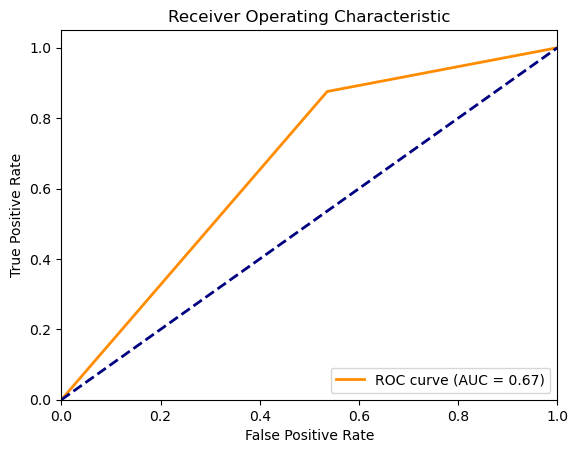

In [67]:
##plot the ROC curve for this hyperparameter setting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### The best threshold that optimized that maximum f1 score  seems to be zero and the maximum f1 score is 0.73, which is satisfactory as per the data provided as part B aslo has the similar type of f1-scores. Finally, we have plotted the curve which provides the area under curve for roc. The best hyper paramter was penalty=l2, solver=lbfgs and c=10

### 23) Compute the AUC score

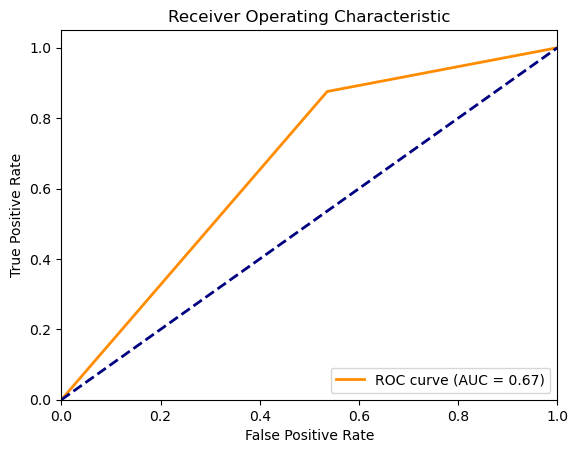

In [68]:
##plot the ROC curve for this hyperparameter setting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Since we already printed the curve in previous questions which also provides the area under the curve which is 0.67 which means the model is better than random guessing. The model has some ability to distinguish between the positive and negative classes but is not highly accurate.

### 24) Generate the precision-recall curve and determine the optimal threshold (visually).

### This part is same as part 23 with additional lines for precsion and recall just added some lines to question number 23 and printed the results.

The best values are:

Best Overall F1 Score: 0.7301127540937324

Best Overall Threshold: 0.0

Best Overall Precision: 0.7716955941255007

Best Overall Recall: 0.8770864946889226


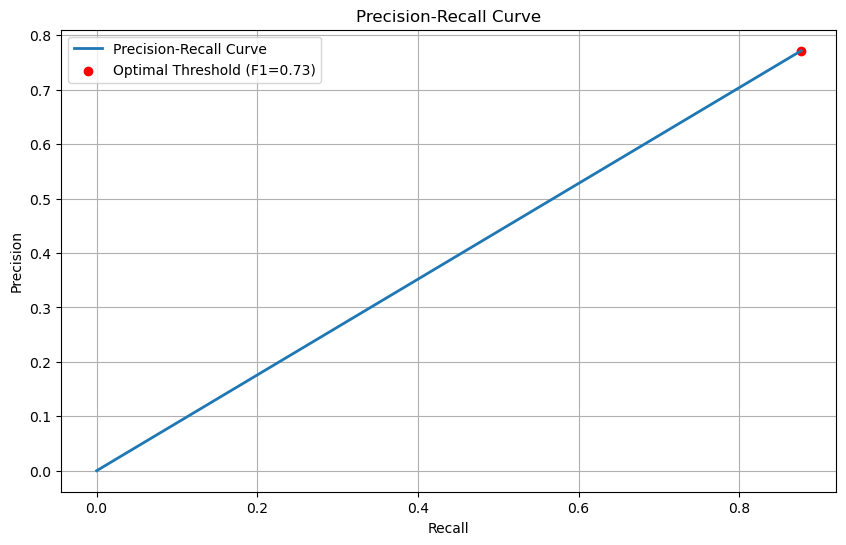

In [69]:
## initializing the values
best_f1 = 0
best_threshold = 0
best_precision = 0
best_recall = 0

## create empty list for the final values of precision and recall
precision_values = []
recall_values = []

## use for loop over hyperparameters 
for c in C_values:
    for p in penalty_values:
        # Define the model with its parameters
        solver = 'liblinear' if p == 'l1' else 'lbfgs'
        model_args = {'penalty': p, 'C': c, 'solver': solver, "max_iter": 1000}

        ## apply sFold cross-validation defined in question 17
        expected_labels2, predicted_labels2, avg_error = sFold(5, test_data, test_labels, LogisticRegression, model_args, f1_score)

        ## formula for roc_auc
        fpr, tpr, thresholds_roc = roc_curve(expected_labels2, predicted_labels2)
        roc_auc = auc(fpr, tpr)

        ## initialize variables to store the best F1 score and threshold
        best_f1_for_current_setting = 0
        best_threshold_for_current_setting = 0
        
        ## initialize lists to store precision and recall values for the current hyperparameters
        precision_values_current = []
        recall_values_current = []
        
        ## looping for the threshold and labels
        for threshold in thresholds_roc:
           # Calculate F1 score for the current threshold
            predicted_labels_thresholded = (predicted_labels2 > threshold).astype(int)
            f1 = f1_score(expected_labels2, predicted_labels_thresholded, average="weighted", zero_division=0)


            ## using if else for the threshold
            if f1 > best_f1_for_current_setting:
                best_f1_for_current_setting = f1
                best_threshold_for_current_setting = threshold

            ## calculate precision and recall for the current threshold
            precision_current = precision_score(expected_labels2, predicted_labels_thresholded, zero_division=0)
            recall_current = recall_score(expected_labels2, predicted_labels_thresholded, zero_division=0)
            precision_values_current.append(precision_current)
            recall_values_current.append(recall_current)

        ## check if the current best F1 score is better 
        ## few lines aree added here for precisiona nd recall from question number 23
        if best_f1_for_current_setting > best_f1:
            best_f1 = best_f1_for_current_setting
            best_threshold = best_threshold_for_current_setting
            best_precision = precision_values_current[thresholds_roc.tolist().index(best_threshold_for_current_setting)]
            best_recall = recall_values_current[thresholds_roc.tolist().index(best_threshold_for_current_setting)]
            best_hyperparameters = {'C': c, 'penalty': p, 'solver': solver}
            
            ## store precision and recall values for the current hyperparameters
            precision_values = precision_values_current
            recall_values = recall_values_current

print("The best values are:")
print("\nBest Overall F1 Score:", best_f1)
print("\nBest Overall Threshold:", best_threshold)
print("\nBest Overall Precision:", best_precision)
print("\nBest Overall Recall:", best_recall)

## plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_values, precision_values, label='Precision-Recall Curve', linewidth=2)
plt.scatter([best_recall], [best_precision], c='red', marker='o', label=f'Optimal Threshold (F1={best_f1:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


### 25) Calculate and report the 95% confidence interval on the generalization error estimate

In [70]:
performance_df

,Experiment name,penalty,solver,C,f1-score,precision,recall,accuracy,generalized_error
0,"penalty=l1, solver=liblinear, C=0.1",l1,liblinear,0.1,0.742139,0.641226,0.677551,0.677551,0.322449
0,"penalty=l2, solver=lbfgs, C=0.1",l2,lbfgs,0.1,0.742139,0.685839,0.703061,0.703061,0.296939
0,"penalty=l1, solver=liblinear, C=1.0",l1,liblinear,1.0,0.742139,0.723166,0.735714,0.735714,0.264286
0,"penalty=l2, solver=lbfgs, C=1.0",l2,lbfgs,1.0,0.742139,0.711724,0.725510,0.725510,0.274490
0,"penalty=l1, solver=liblinear, C=10.0",l1,liblinear,10.0,0.742139,0.732810,0.743878,0.743878,0.256122
0,"penalty=l2, solver=lbfgs, C=10.0",l2,lbfgs,10.0,0.742139,0.729306,0.740816,0.740816,0.259184


In [71]:
'''
The mean average will be 0.74 for all the above f1-score as all are almost same
CI = Mean ± (Z * (Standard Deviation / √N))
 Z is the value (1+(conf/2)) which is 3.95/2== 1.96
CI = 0.74 ± (1.975 * (0 / √6)) # Since the standard deviation is 0


CI = 0.74 

'''


'\nThe mean average will be 0.74 for all the above f1-score as all are almost same\nCI = Mean ± (Z * (Standard Deviation / √N))\n Z is the value (1+(conf/2)) which is 3.95/2== 1.96\nCI = 0.74 ± (1.975 * (0 / √6)) # Since the standard deviation is 0\n\n\nCI = 0.74 \n\n'

#### The standard deviation for the given table seems to be zero as f1-scores are same for all so the confidence interval for 95% is [.74,.74]

### Write a “Summary and Methods” section. [10 pts] No more than 2-5 sentences for each
question below
i. Provide a summary of the project and what you completed in the assignment.
ii. Describe the dataset and features. What is the target? What are you calculating it from?
iii. Describe the differences in fit and predict between the regularized logistic regression vs
KNN_Classifier. In particular, discuss training time vs prediction time for large data.
Also discuss the hyperparameters of each and why they are used.

### i. Provide a summary of the project and what you completed in the assignment

### The project seems to be very well designed to grasp the ML knowledge from basic ground level to high levels. This assignment helped me a lot and tought me a lot about ML and its various aspects. I did some ML modeling before like Knn and logistic but i never did with sfold which is a kind of new experience and new learning.  the first part was interesting for me where i learned the basic idea behind functions and how to generate various values using algorithm without using any specific library. This helped me to refresh my previous knowledge.

### ii. Describe the dataset and features. What is the target? What are you calculating it from?

### The dataset is about wine quality which basically has two quality good and bad. The level below 5 is bad quality and above 5 is good quality. The dataset has 4898 rows and 12 columns where there are various types of factors that were related to wine quality.  The target is wine quality whether good or bad. For this dataset we are calculating the model performance to identify the wine quality based on the given features left after removing the redundent features. The model needs to predict whether a wine is good or bad on the basic of training set which we trained with various ML models.

### iii. Describe the differences in fit and predict between the regularized logistic regression vs KNN_Classifier. In particular, discuss training time vs prediction time for large data. Also discuss the hyperparameters of each and why they are used.

### Ans
### Logistic regression learns a set of parameters that defines the decision boundry where training involves optimization. In logistic the training time is faster for larget dataset and regularization also helps to control the overfitting problem. The predict time for logistic is very fast. The regularization hypoer parameter are of l1 and l2 types where l1 incourage sparsity and l2 penalized large cofficients.

### Knn is non parametric model where it doesnot learn during the training. fitting time for Knn is slow as well as the prediction time is alos low for large datasets as it needs to compare the new instance with the stored during training. The hyper parameters for knn are distanvce mertic, weights and k values. K value determines the nearest neighbors, distance specifies the measures of distance

### 27) Write a “Results” section. [15 pts] No more than 2-5 sentences for each question below

### a) Describe the performance of the KNN model with respect to the different levels of k and the different distance metrics. Include a table of performances, bolding the best.

In [72]:
'''
Experiment name	n_neighbors	distance	weights	Average F1
0	k=5, distance=manhattan, weights=distance	5	manhattan	distance	0.762541
1	k=11, distance=manhattan, weights=distance	11	manhattan	distance	0.759131
2	k=9, distance=manhattan, weights=distance	9	manhattan	distance	0.757177
3	k=5, distance=euclidean, weights=distance	5	euclidean	distance	0.753272
4	k=11, distance=euclidean, weights=distance	11	euclidean	distance	0.753108
5	k=9, distance=euclidean, weights=distance	9	euclidean	distance	0.752626
6	k=1, distance=manhattan, weights=uniform	1	manhattan	uniform	0.741033
7	k=1, distance=manhattan, weights=distance	1	manhattan	distance	0.741033
8	k=1, distance=euclidean, weights=uniform	1	euclidean	uniform	0.730935
9	k=1, distance=euclidean, weights=distance	1	euclidean	distance	0.730935
10	k=5, distance=manhattan, weights=uniform	5	manhattan	uniform	0.711048
11	k=5, distance=euclidean, weights=uniform	5	euclidean	uniform	0.697996
12	k=9, distance=manhattan, weights=uniform	9	manhattan	uniform	0.684744
13	k=9, distance=euclidean, weights=uniform	9	euclidean	uniform	0.682635
14	k=11, distance=manhattan, weights=uniform	11	manhattan	uniform	0.682007
15	k=11, distance=euclidean, weights=uniform	11	euclidean	uniform	0.675670
'''

'\nExperiment name\tn_neighbors\tdistance\tweights\tAverage F1\n0\tk=5, distance=manhattan, weights=distance\t5\tmanhattan\tdistance\t0.762541\n1\tk=11, distance=manhattan, weights=distance\t11\tmanhattan\tdistance\t0.759131\n2\tk=9, distance=manhattan, weights=distance\t9\tmanhattan\tdistance\t0.757177\n3\tk=5, distance=euclidean, weights=distance\t5\teuclidean\tdistance\t0.753272\n4\tk=11, distance=euclidean, weights=distance\t11\teuclidean\tdistance\t0.753108\n5\tk=9, distance=euclidean, weights=distance\t9\teuclidean\tdistance\t0.752626\n6\tk=1, distance=manhattan, weights=uniform\t1\tmanhattan\tuniform\t0.741033\n7\tk=1, distance=manhattan, weights=distance\t1\tmanhattan\tdistance\t0.741033\n8\tk=1, distance=euclidean, weights=uniform\t1\teuclidean\tuniform\t0.730935\n9\tk=1, distance=euclidean, weights=distance\t1\teuclidean\tdistance\t0.730935\n10\tk=5, distance=manhattan, weights=uniform\t5\tmanhattan\tuniform\t0.711048\n11\tk=5, distance=euclidean, weights=uniform\t5\teuclidea

### performance of the model seems to be increasing with different k valuesin a random oder with distance metric but it seesm to be higher with weight when weight is distance and is lower when weight is unifron. In this data the knn model with weight == distance seesm to have higher accuracy for any value of k given in the list.

### b) Characterize the overall performance of your model.

### The overall performance of the model is not so satisfactory because we were not able to achive the highest level of accuracy and f1-score. The most achived by the model is 82% accuracy for inverse weighted knn and f1-score of 87% percentage for inverse knn of part B and for part C highest accuracy was about 75% only.There could be various reason for this accuracy and the performance. One of  reason seems to be the dataset is imbalance with good quality label higher than bad quality. 

### c) Discuss which quality values led to good performance of your model and those that resulted in poor performance. Include a table of average error (e.g., F1 score) to support your claims.

In [73]:
'''
Experiment name	penalty	solver	C	f1-score	precision	recall	accuracy	generalized_error
0	penalty=l1, solver=liblinear, C=0.1	l1	liblinear	0.1	0.742139	0.643043	0.678571	0.678571	0.321429
0	penalty=l2, solver=lbfgs, C=0.1	l2	lbfgs	0.1	0.742139	0.685839	0.703061	0.703061	0.296939
0	penalty=l1, solver=liblinear, C=1.0	l1	liblinear	1.0	0.742139	0.721955	0.734694	0.734694	0.265306
0	penalty=l2, solver=lbfgs, C=1.0	l2	lbfgs	1.0	0.742139	0.711724	0.725510	0.725510	0.274490
0	penalty=l1, solver=liblinear, C=10.0	l1	liblinear	10.0	0.742139	0.732880	0.743878	0.743878	0.256122
0	penalty=l2, solver=lbfgs, C=10.0	l2	lbfgs	10.0	0.742139	0.729306	0.740816	0.740816	0.259184
'''


'''
  precision    recall  f1-score   support

           0       0.68      0.61      0.64       321
           1       0.82      0.86      0.84       659

    accuracy                           0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.77      0.78      0.77       980

'''

'\n  precision    recall  f1-score   support\n\n           0       0.68      0.61      0.64       321\n           1       0.82      0.86      0.84       659\n\n    accuracy                           0.78       980\n   macro avg       0.75      0.74      0.74       980\nweighted avg       0.77      0.78      0.77       980\n\n'

### The good quality(1) of the wine dataset  leads to the better performance of the dataset as we see that good quality has the highest value of precision, recall and accuracy.  We can observe both the tables above to support our observation.

### d) Give any final conclusions

### There colud be the various reasons for the model to perform very poor. The data could be the reason or the model we choosed could be not the best model for this dataset. I would like to perform the same data training process with other ML models like SVM, NB, random forests to see what will their output result and compare with our project result.